Import and Load Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
customers = pd.read_parquet("../data/processed/customers_clean.parquet")
orders = pd.read_parquet("../data/processed/orders_clean.parquet")
order_items = pd.read_parquet("../data/processed/order_items_clean.parquet")
products = pd.read_parquet("../data/processed/products_clean.parquet")
transactions = pd.read_parquet("../data/processed/transactions_clean.parquet")

print(customers.shape, orders.shape, order_items.shape)

(50, 7) (100, 4) (303, 4)


Compute Key Descriptive Statistics

In [3]:
# Basic overview
print(orders.describe())
print(order_items.describe())

# Join orders + items + products for analysis
merged = order_items.merge(orders, on="order_id").merge(products, on="product_id")
merged["order_date"] = pd.to_datetime(merged["order_date"])
merged["revenue"] = merged["quantity"] * merged["price"]
merged.head()

        order_id  customer_id
count      100.0        100.0
mean        50.5        25.55
std    29.011492    14.130256
min          1.0          2.0
25%        25.75        14.75
50%         50.5         26.5
75%        75.25        37.25
max        100.0         50.0
        order_id  product_id  quantity  total_price
count      303.0       303.0     303.0        303.0
mean    47.69637   10.739274  2.056106   432.997756
std    28.786153    5.794037  0.797443   402.650391
min          1.0         1.0       1.0         8.96
25%         23.5         6.0       1.0       106.05
50%         46.0        11.0       2.0       335.96
75%         71.0        16.0       3.0       671.92
max        100.0        20.0       3.0      1429.32


,order_id,product_id,quantity,total_price,customer_id,order_date,status,product_name,category,price,stock,revenue
0,1,11,2,120.42,4,2025-05-10,Cancelled,Tonight,Home,60.21,200,120.42
1,1,18,2,233.0,4,2025-05-10,Cancelled,Paper,Electronics,116.5,192,233.0
2,1,4,2,65.38,4,2025-05-10,Cancelled,Truth,Books,32.69,33,65.38
3,1,19,3,1330.8,4,2025-05-10,Cancelled,Rock,Clothing,443.6,58,1330.8
4,2,10,2,952.88,24,2025-01-07,Delivered,Brother,Electronics,476.44,121,952.88


Visualization 1: Revenue Over Time

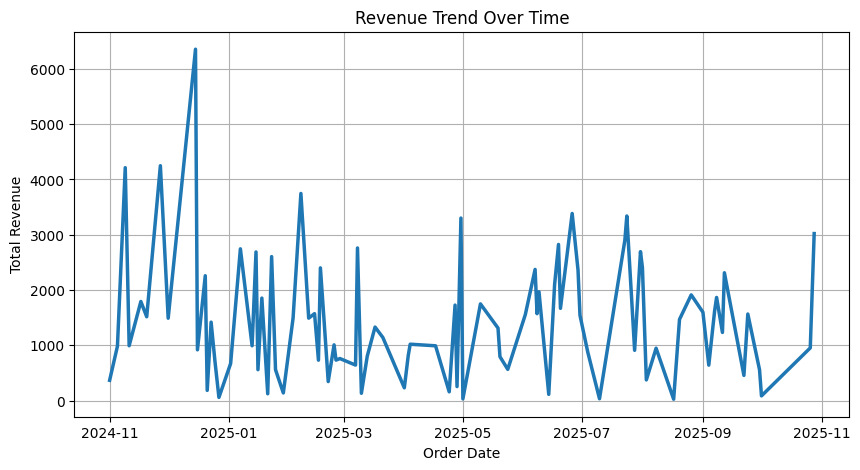

In [6]:
revenue_time = merged.groupby("order_date")["revenue"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=revenue_time, x="order_date", y="revenue", linewidth=2.5)
plt.title("Revenue Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

Visualization 2: Top Customers by Total Spend

C:\Users\97156\AppData\Local\Temp\ipykernel_15576\2276426069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")


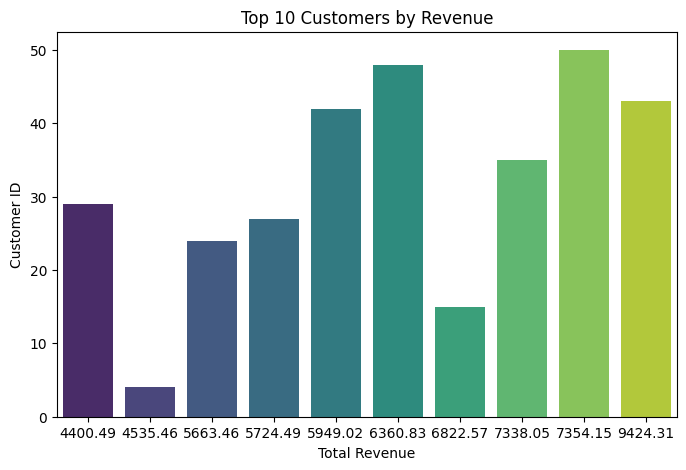

In [7]:
top_customers = merged.groupby("customer_id")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.show()

Visualization 3: Product Performance (Revenue by Category)

C:\Users\97156\AppData\Local\Temp\ipykernel_15576\380813923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="revenue", y="category", palette="crest")


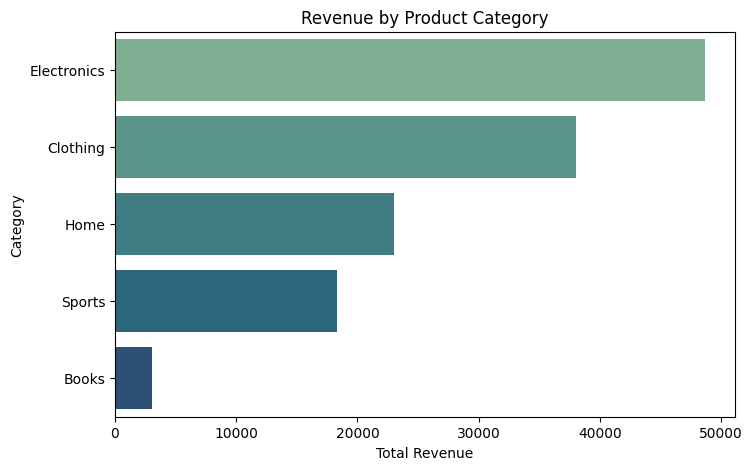

In [8]:
category_sales = merged.groupby("category")["revenue"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x="revenue", y="category", palette="crest")
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.show()

Visualization 4: Correlation Heatmap + Boxplot

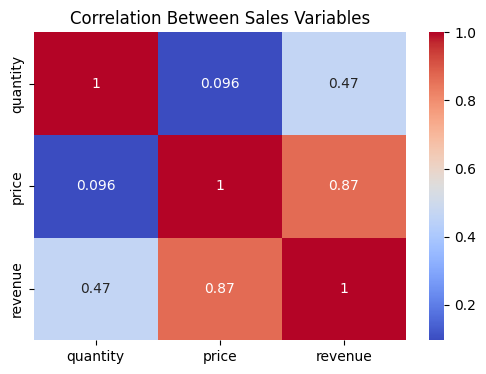

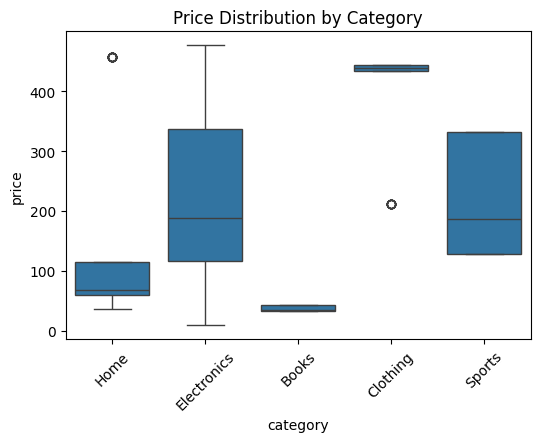

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(merged[["quantity", "price", "revenue"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Sales Variables")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=merged, x="category", y="price")
plt.title("Price Distribution by Category")
plt.xticks(rotation=45)
plt.show()